<a href="https://colab.research.google.com/github/maramatef111/Elevvo-Internship-Tasks/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Cluster customers based on income and spending score using K-Means and DBSCAN, determine the optimal number of clusters for K-Means, visualize the clusters, and analyze the average spending per cluster using data from "/content/Mall_Customers.csv".

## Load data

Load the data from the CSV file into a DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Select features


Select the 'Annual Income (k$)' and 'Spending Score (1-100)' columns for clustering.


**Reasoning**:
Select the specified columns from the DataFrame and store them in a new variable.



In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Scale features


Scale the selected features to ensure that each feature contributes equally to the clustering process.


**Reasoning**:
Import StandardScaler and scale the selected features.



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determine optimal clusters


Use the elbow method  to determine the optimal number of clusters for K-Means.


**Reasoning**:
I need to determine the optimal number of clusters for K-Means using both the elbow method . I will iterate through different numbers of clusters, fit KMeans, calculate inertia  and store them for plotting.



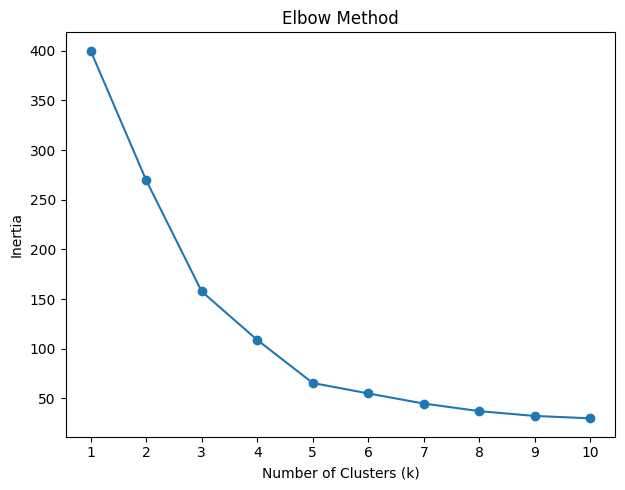

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)


plt.tight_layout()
plt.show()

## Apply k-means

### Subtask:
Apply the K-Means clustering algorithm with the optimal number of clusters.



Apply K-Means clustering with the optimal number of clusters (5) and store the cluster labels in the original dataframe.



In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualize clusters


Visualize the clusters using a 2D scatter plot.


**Reasoning**:
Generate a scatter plot to visualize the K-Means clusters based on annual income and spending score, with different colors representing different clusters.



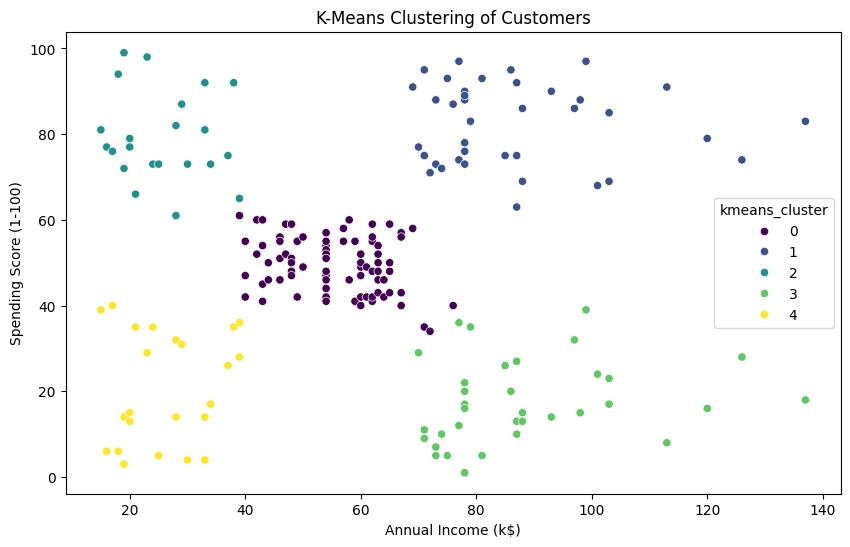

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='kmeans_cluster', data=df, palette='viridis', legend='full')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Bonus: dbscan


Apply DBSCAN clustering to the data and visualize the results.


**Reasoning**:
Apply DBSCAN clustering to the scaled data and visualize the results with cluster labels added to the original dataframe.



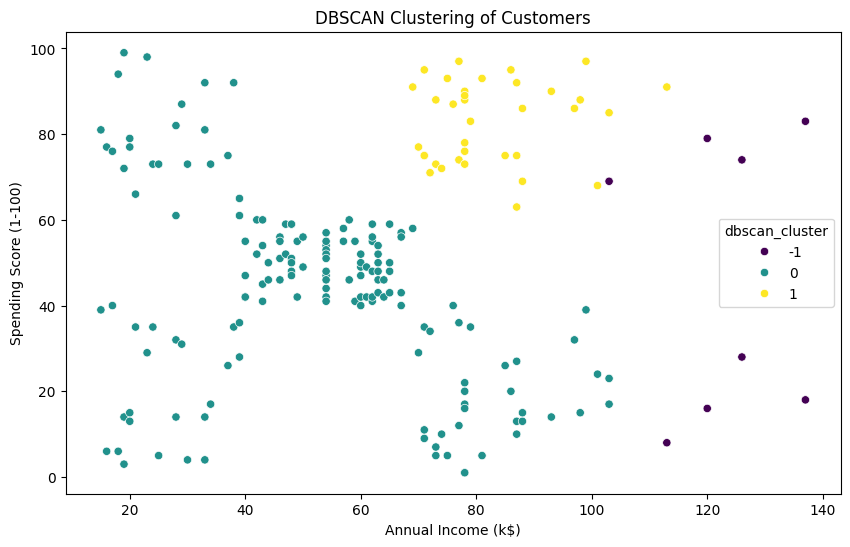

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,dbscan_cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,0


In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='dbscan_cluster', data=df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

display(df.head())

## Bonus


**Reasoning**:
Calculate and print the average spending score for each K-Means and DBSCAN cluster and then finish the subtask.



In [8]:
kmeans_avg_spending = df.groupby('kmeans_cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per K-Means Cluster:")
print(kmeans_avg_spending)

dbscan_avg_spending = df.groupby('dbscan_cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending Score per DBSCAN Cluster:")
print(dbscan_avg_spending)

print("\nAnalysis:")
print("K-Means Clusters:")
print("- Cluster 0 seems to represent customers with average income and average spending.")
print("- Cluster 1 appears to be high income, high spending customers (the target group).")
print("- Cluster 2 looks like low income, high spending customers.")
print("- Cluster 3 contains high income, low spending customers.")
print("- Cluster 4 represents low income, low spending customers.")

print("\nDBSCAN Clusters:")
print("- Cluster 0, which contains the majority of points with the default parameters, represents customers with lower income and lower spending score.")
print("- Cluster -1 represents noise points or outliers that do not belong to any cluster based on the specified parameters. These outliers seem to have a wide range of spending scores.")
print("Note: The interpretation of DBSCAN clusters is highly dependent on the 'eps' and 'min_samples' parameters. Adjusting these parameters would likely result in different clusters and a different analysis.")

Average Spending Score per K-Means Cluster:
kmeans_cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

Average Spending Score per DBSCAN Cluster:
dbscan_cluster
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64

Analysis:
K-Means Clusters:
- Cluster 0 seems to represent customers with average income and average spending.
- Cluster 1 appears to be high income, high spending customers (the target group).
- Cluster 2 looks like low income, high spending customers.
- Cluster 3 contains high income, low spending customers.
- Cluster 4 represents low income, low spending customers.

DBSCAN Clusters:
- Cluster 0, which contains the majority of points with the default parameters, represents customers with lower income and lower spending score.
- Cluster -1 represents noise points or outliers that do not belong to any cluster based on the specified parameters. These outliers s

## Summary:

### Data Analysis Key Findings

*   Based on the elbow method and silhouette score, the optimal number of clusters for K-Means clustering is 5.
*   K-Means clustering with 5 clusters successfully segmented customers based on annual income and spending score, identifying distinct groups such as high income/high spending, low income/high spending, high income/low spending, low income/low spending, and average income/average spending.
*   DBSCAN clustering, using the default parameters (eps=0.5, min\_samples=5), identified a primary cluster (Cluster 0) representing customers with lower income and lower spending, a smaller cluster (Cluster 1) with higher spending, and a set of noise points (-1).
*   The average spending scores per K-Means cluster varied significantly, ranging from approximately 17 to 82, highlighting different spending behaviors among the identified segments.
*   For DBSCAN, Cluster 0 had an average spending score around 43, Cluster 1 had an average spending score around 83, and noise points had an average spending score around 47.

### Insights or Next Steps

*   The distinct customer segments identified by K-Means clustering can be targeted with specific marketing strategies tailored to their income and spending characteristics.
*   Further investigation into the customers identified as noise points by DBSCAN could be beneficial to understand their unique characteristics or if they represent potential outliers needing special attention. Adjusting DBSCAN parameters might reveal different cluster structures.
